In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#import nltk

In [71]:
# Access and process the raw data
path = ('/Users/nataliaagudelo/Desktop/Classes/thinkful/DataScienceBootCamp/Unit2/Unit1_2_7/sentiment labelled sentences/amazon_cells_labelled.txt')
path2 = ('/Users/nataliaagudelo/Desktop/Classes/thinkful/DataScienceBootCamp/Unit2/Unit1_2_7/sentiment labelled sentences/yelp_labelled.txt')



raw_data1 = pd.read_csv(path, delimiter='\t', header=None)
raw_data1.columns = ['message', 'sentiment']
raw_data1.head()


raw_data2 = pd.read_csv(path2, delimiter='\t', header=None)
raw_data2.columns = ['message', 'sentiment']
#raw_data2.head()


In [72]:
df_positive = raw_data1[raw_data1["sentiment"] == 1]
df_positive.head()

,message,sentiment
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1


In [73]:
df_positive.message.str.split(expand=True).stack().value_counts().tail(10)

sounded      1
8530         1
NOTHING!I    1
charging     1
Amazon,      1
mega         1
toast        1
screen.      1
choices      1
enter        1
dtype: int64

In [80]:
# Create potential words of good sentiment
keywords = ["psyched","exceptional","battery","Good","quality","most","life","made","did","sturdy","definitely","quickly","original","better","Nice", "nice", "fits", "comfortable", "working", "pretty","Timely", "using", "simpler", "neat","well","like","love", "has", "I'have", "excels", 'excellent', 'good', 'great', "Great", "recommend", 'loved', 'best', 'works', 'fine', 'elegant', 'cool', 'beautiful', 'fast']

for key in keywords:
    raw_data1[str(key)] = raw_data1.message.str.contains(' ' + str(key) + ' ', case=False)

    # Add spaces around the key so you get the words and not only the pattern matching
    # To add new features to the dataframe, just add them to the keywords list

raw_data1.head()

,message,sentiment,psyched,exceptional,battery,Good,quality,most,life,made,...,Great,recommend,loved,best,works,fine,elegant,cool,beautiful,fast
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
# Turn the spam column into a boolean to be able to run statistics
raw_data1['sentiment'] =(raw_data1['sentiment'] == 1)
raw_data1.head()

,message,sentiment,psyched,exceptional,battery,Good,quality,most,life,made,...,Great,recommend,loved,best,works,fine,elegant,cool,beautiful,fast
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


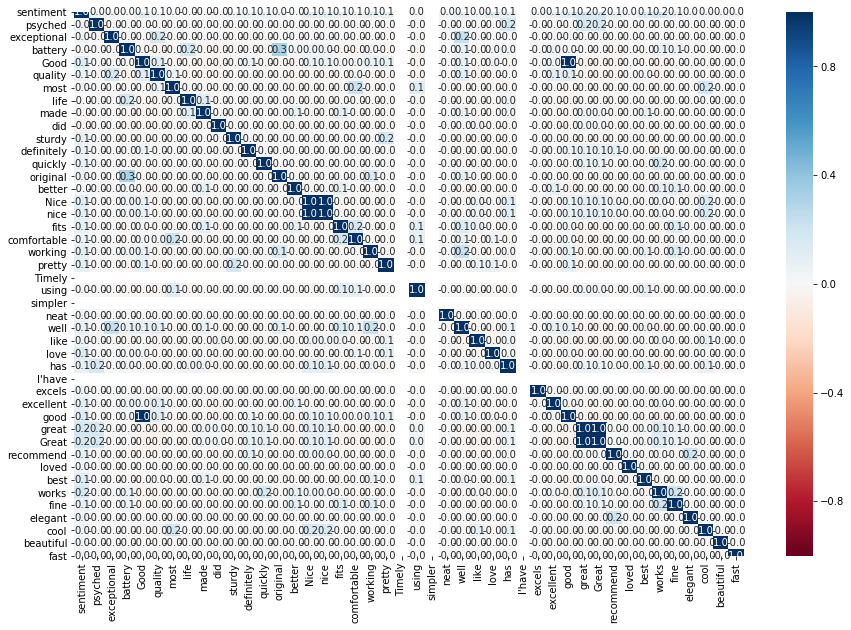

In [82]:
# Look at how independent all the variables are
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(raw_data1.corr(),cmap='RdBu', annot=True, fmt='.1f', vmin=-1, vmax=1)
plt.show()

In [89]:
# specify data and target
# data=all the words that could potentially identify good sentiment
# target= is the category or label of sentiment

#data_amazon = raw_data1[keywords]
#target_amazon = raw_data1['sentiment']

#data_yelp = raw_data2[keywords]
target_yelp = raw_data2['sentiment']

In [90]:
# The data is binary/boolean, therefore, import the Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

# Instantiate the model and store it in a new variable
bnb = BernoulliNB()

# Fit the model to the data
bnb.fit(data_amazon, target_amazon)

# Classify, store results in a new variable
y_pred = bnb.predict(data_amazon)

# Display results
print ("Number of misslabeled points out of a total %d point : %d"
       %(data_amazon.shape[0], (target_amazon != y_pred).sum()))



Number of misslabeled points out of a total 1000 point : 322


In [91]:
# Fit the model to the data
bnb.fit(data_amazon, target_yelp)

# Classify, store results in a new variable
y_pred = bnb.predict(data_amazon)

# Display results
print ("Number of misslabeled points out of a total %d point : %d"
       %(data_amazon.shape[0], (target_yelp != y_pred).sum()))




Number of misslabeled points out of a total 1000 point : 427
